[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


(-0.5, 1279.5, 719.5, -0.5)

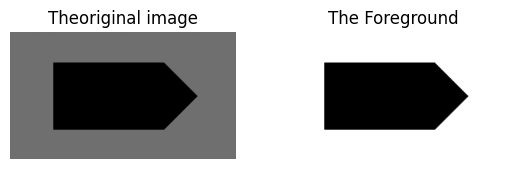

In [ ]:
from skimage import io
import numpy as np
from scipy.ndimage import gaussian_filter
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('image2.jpeg')


def region_growing(image, seeds, threshold):

  new_image = np.zeros((image.shape[0], image.shape[1]))

  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      new_image[x, y] = image[x, y, 0]

  rows, cols = new_image.shape

  # Initialize segmentation mask
  segmentation = np.zeros_like(new_image, dtype=bool)

  # Process each seed point
  for seed in seeds:
    seed_row, seed_col = seed
    if not (0 <= seed_row < rows and 0 <= seed_col < cols):
      continue

    # Queue for breadth-first search
    queue = [(seed_row, seed_col)]
    visited = set()

    while queue:
      row, col = queue.pop(0)
      if (row, col) in visited:
        continue
      visited.add((row, col))
      segmentation[row, col] = True

      # Check neighboring pixels
      for drow, dcol in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        new_row, new_col = row + drow, col + dcol
        if not (0 <= new_row < rows and 0 <= new_col < cols):
          continue
        if segmentation[new_row, new_col]:
          continue
        if abs(new_image[row, col] - new_image[new_row, new_col]) <= threshold:
          queue.append((new_row, new_col))

  return segmentation


seeds = [(360, 640), (365, 640), (355, 620), (340, 700), (400, 620), (405, 700)]
threshold = 3

segmentation = region_growing(image, seeds, threshold)

print(segmentation)

foreground = np.zeros((image.shape[0], image.shape[1], 3))

for i in range(segmentation.shape[0]):
  for j in range(segmentation.shape[1]):
    if(segmentation[i, j] == True):
        foreground[i,j] = [0,0,0]
    else:
        foreground[i,j] = [255,255,255]

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Theoriginal image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(foreground, cmap='gray')
plt.title("The Foreground")
plt.axis('off')